BIGGER FONT SIZE
COLORS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import copy as cp

In [ ]:
color_palette_primary = [
    "#3B6BA5",  # Primary Blue
    "#5DA5DA",  # Soft Sky Blue
    "#60BD68",  # Primary Green
    "#B5BD61",  # Lime-Yellow
    "#FAA43A",  # Primary Orange
    "#FDD262",  # Golden Yellow
    "#B276B2",  # Violet
    "#9C9EDE",  # Soft Indigo
    "#F17CB0",  # Magenta
    "#8C8C8C"   # Neutral Gray
]

global_alpha = 0.8
global_grid_alpha = 0.3

global_fontsize = 18
global_fontsize_small = 15

rcParams['font.family'] = 'Fira Sans'

# saving location
save_path = "/work3/monka/tta-vlm-new/benchmark_visualizations/"

In [3]:
def subplots(data, xlabel='Number of\nAugmentations', savename='subplots.pdf', target_range=10):
    # Create subplots
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    # fig.suptitle('Model Performance vs Number of Augmentations', fontsize=14, y=0.98)

    # Flatten axes for easier iteration
    axes = axes.flatten()

    # Colors for different datasets
    for i, (dataset, values) in enumerate(data.items()):
        ax = axes[i]
        ax.plot(values["n_aug"], values["scores"], 'o-',
                linewidth=1.5, markersize=4,
                color=color_palette_primary[i], markerfacecolor='white',
                markeredgewidth=1.5, markeredgecolor=color_palette_primary[i],
                alpha=global_alpha)

        # Add baseline line if baseline field exists
        if "baseline" in values:
            ax.axhline(y=values["baseline"], color='gray', linestyle='--', 
                      linewidth=1.5, alpha=global_grid_alpha, label=f'Baseline ({values["baseline"]:.1f})')

        # Calculate y-axis limits with consistent range
        min_val = min(values["scores"])
        max_val = max(values["scores"])
        
        # Include baseline in y-axis calculation if it exists
        if "baseline" in values:
            min_val = min(min_val, values["baseline"])
            max_val = max(max_val, values["baseline"])
        
        data_range = max_val - min_val
        
        # If data range is very small, expand it
        if data_range < target_range:
            center = (min_val + max_val) / 2
            y_min = center - target_range / 2
            y_max = center + target_range / 2
        else:
            # Add some padding to existing range
            padding = data_range * 0.1
            y_min = min_val - padding
            y_max = max_val + padding
        
        # Ensure y_min doesn't go below 0 for accuracy percentages
        y_min = max(0, y_min)
        ax.set_ylim(y_min, y_max)

        ax.set_title(dataset, fontsize=global_fontsize, pad=global_fontsize//2)
        ax.set_xlabel(xlabel, fontsize=global_fontsize_small)
        ax.set_ylabel('Accuracy (%)', fontsize=global_fontsize_small)
        ax.grid(True, which='both', axis="y", alpha=global_grid_alpha)
        ax.tick_params(labelsize=global_fontsize_small)
        ax.minorticks_on()
        ax.tick_params(which='minor')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(right=1.1, top=0.95)
    plt.show()

    fig.savefig(f"{save_path}/{savename}", bbox_inches='tight')

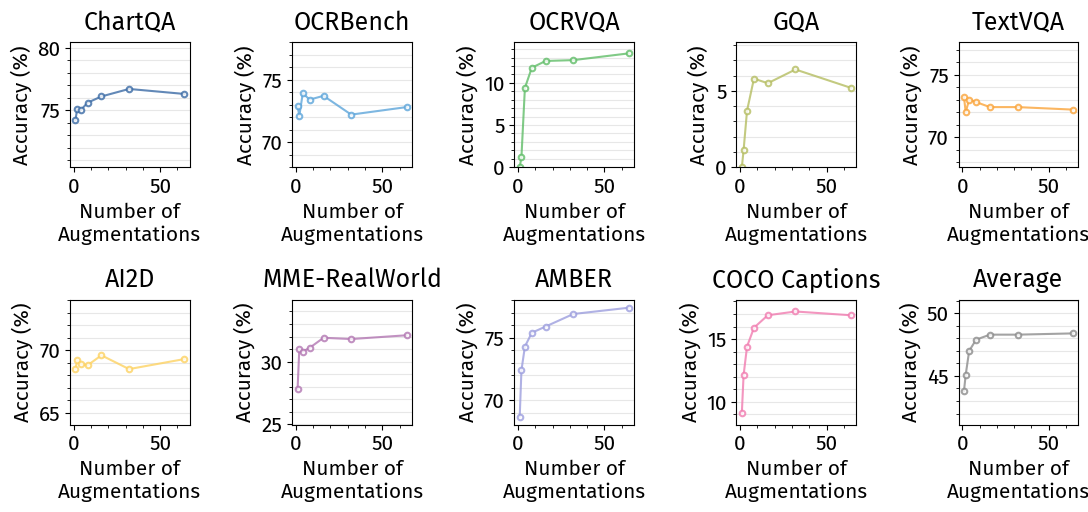

In [4]:
# Number of augmentations vs accuracy data
data = {
    "ChartQA": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [74.2, 75.1, 75.0, 75.6, 76.1, 76.7, 76.3]
    },
    "OCRBench": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [72.9, 72.1, 73.9, 73.4, 73.7, 72.2, 72.8]
    },
    "OCRVQA": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [0.0, 1.2, 9.4, 11.8, 12.6, 12.7, 13.5]
    },
    "GQA": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [0.0, 1.1, 3.7, 5.8, 5.5, 6.4, 5.2]
    },
    "TextVQA": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [73.2, 72.0, 73.0, 72.8, 72.4, 72.4, 72.2]
    },
    "AI2D": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [68.5, 69.2, 68.9, 68.8, 69.6, 68.5, 69.3]
    },    
    "MME-RealWorld": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [27.8, 31.0, 30.8, 31.1, 31.9, 31.8, 32.1]
    },
    "AMBER": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [68.7, 72.4, 74.3, 75.4, 75.9, 76.9, 77.4]
    },
    "COCO Captions": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [9.1, 12.1, 14.4, 15.9, 16.9, 17.2, 16.9]
    },    
    "Average": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [43.8, 45.1, 47.0, 47.9, 48.3, 48.3, 48.4]
    }
}

subplots(data, xlabel='Number of\nAugmentations', savename='subplots.pdf', target_range=10)

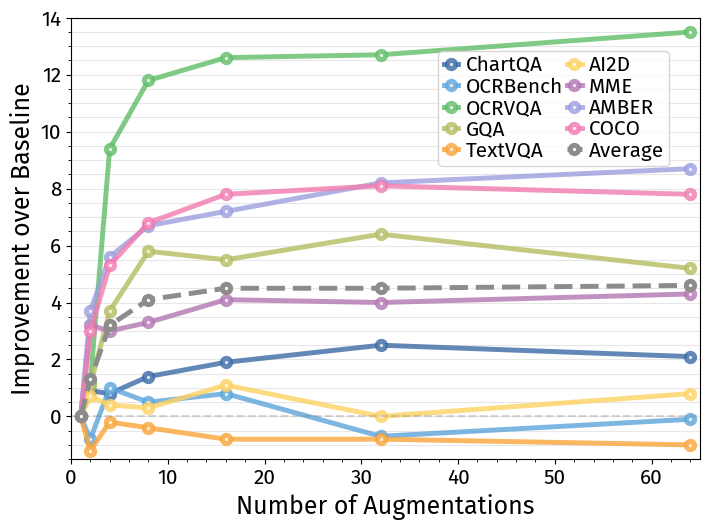

In [5]:
# Number of augmentations vs accuracy data
data = {
    "ChartQA": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [74.2, 75.1, 75.0, 75.6, 76.1, 76.7, 76.3]
    },
    "OCRBench": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [72.9, 72.1, 73.9, 73.4, 73.7, 72.2, 72.8]
    },
    "OCRVQA": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [0.0, 1.2, 9.4, 11.8, 12.6, 12.7, 13.5]
    },
    "GQA": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [0.0, 1.1, 3.7, 5.8, 5.5, 6.4, 5.2]
    },
    "TextVQA": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [73.2, 72.0, 73.0, 72.8, 72.4, 72.4, 72.2]
    },
    "AI2D": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [68.5, 69.2, 68.9, 68.8, 69.6, 68.5, 69.3]
    },    
    "MME": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [27.8, 31.0, 30.8, 31.1, 31.9, 31.8, 32.1]
    },
    "AMBER": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [68.7, 72.4, 74.3, 75.4, 75.9, 76.9, 77.4]
    },
    "COCO": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [9.1, 12.1, 14.4, 15.9, 16.9, 17.2, 16.9]
    },    
    "Average": {
        "n_aug": [1, 2, 4, 8, 16, 32, 64],
        "scores": [43.8, 45.1, 47.0, 47.9, 48.3, 48.3, 48.4]
    }
}

# but more compact
def overlaid_plot(data, xlabel='Number of Augmentations', savename='overlaid_plot.pdf'):
    # Create single plot
    fig, ax = plt.subplots(1, 1, figsize=(8*0.9, 6*0.9))
    
    # Process data to calculate percentage improvement over n_aug=1
    normalized_data = {}
    for dataset, values in data.items():
        baseline_score = values["scores"][0]  # First element (n_aug=1)
        # Calculate percentage improvement: ((score - baseline) / baseline) * 100
        # normalized_scores = [((score - baseline_score) / (baseline_score + 1e-6)) * 100 for score in values["scores"]]
        normalized_scores = [score - baseline_score for score in values["scores"]]
        normalized_data[dataset] = {
            "n_aug": values["n_aug"],
            "scores": normalized_scores
        }
    
    # Plot each dataset
    for i, (dataset, values) in enumerate(normalized_data.items()):
        # Special styling for Average line
        if dataset == "Average":
            ax.plot(values["n_aug"], values["scores"], 'o--',
                    linewidth=3.55, markersize=6,
                    color=color_palette_primary[i], markerfacecolor='white',
                    markeredgewidth=3.55, markeredgecolor=color_palette_primary[i],
                    alpha=1, label=dataset)
        else:
            ax.plot(values["n_aug"], values["scores"], 'o-',
                    linewidth=3.55, markersize=6,
                    color=color_palette_primary[i], markerfacecolor='white',
                    markeredgewidth=3.55, markeredgecolor=color_palette_primary[i],
                    alpha=global_alpha, label=dataset)
    
    
    # Add horizontal line at 0% (no improvement)
    ax.axhline(y=0, color='gray', linestyle='--', 
              linewidth=1.5, alpha=global_grid_alpha)
    
    # Customize the plot
    ax.set_xlabel(xlabel, fontsize=global_fontsize)
    ax.set_ylabel('Improvement over Baseline', fontsize=global_fontsize)
    ax.grid(True, which='both', axis="y", alpha=global_grid_alpha)
    ax.tick_params(labelsize=global_fontsize_small)
    ax.minorticks_on()
    ax.tick_params(which='minor')
    
    ax.set_xlim(0, 65)
    ax.set_ylim(-1.5, 14)
    
    # Add legend
    ax.legend(fontsize=global_fontsize_small, loc='upper right', ncol=2, borderpad=0.25, labelspacing=0.08, handletextpad=0.35, handlelength=0.7, columnspacing=0.2, bbox_to_anchor=(0.968, 0.949))

    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    fig.savefig(f"{save_path}/{savename}", bbox_inches='tight')
    
overlaid_plot(data, xlabel='Number of Augmentations', savename='overlaid_improvement_plot.pdf')

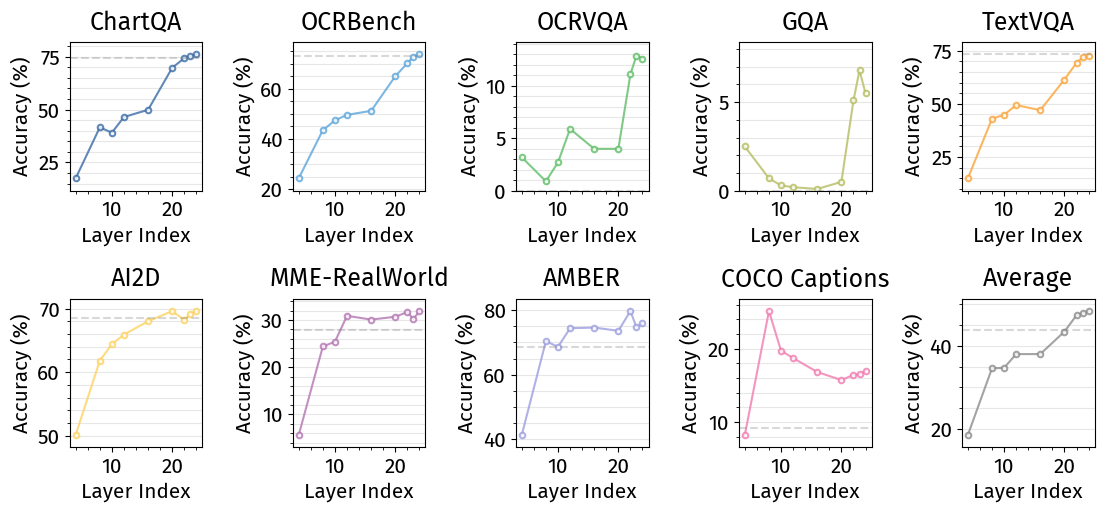

In [6]:
# Layer vs accuracy data
data = {
    "ChartQA": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [17.5, 41.6, 39.1, 46.5, 49.9, 69.8, 74.3, 75.2, 76.1],
        "baseline": 74.2
    },
    "OCRBench": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [24.3, 43.5, 47.4, 49.6, 51.2, 65.0, 70.2, 72.8, 73.7],
        "baseline": 72.9
    },
    "OCRVQA": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [3.2, 0.9, 2.7, 5.9, 4.0, 4.0, 11.1, 12.9, 12.6],
        "baseline": 0.0
    },
    "GQA": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [2.5, 0.7, 0.3, 0.2, 0.1, 0.5, 5.1, 6.8, 5.5],
        "baseline": 0.0
    },
    "TextVQA": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [15.0, 43.0, 44.8, 49.4, 47.0, 61.4, 69.2, 71.8, 72.4],
        "baseline": 73.2
    },
    "AI2D": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [50.1, 61.8, 64.4, 65.9, 68.0, 69.6, 68.2, 69.2, 69.6],
        "baseline": 68.5
    },    
    "MME-RealWorld": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [5.6, 24.4, 25.4, 30.9, 30.1, 30.7, 31.7, 30.2, 31.9],
        "baseline": 27.8
    },
    "AMBER": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [41.3, 70.4, 68.6, 74.4, 74.6, 73.6, 79.7, 74.7, 75.9],
        "baseline": 68.7
    },
    "COCO Captions": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [8.2, 25.1, 19.7, 18.7, 16.8, 15.7, 16.4, 16.5, 16.9],
        "baseline": 9.1
    },    
    "Average": {
        "n_aug": [4, 8, 10, 12, 16, 20, 22, 23, 24],
        "scores": [18.6, 34.6, 34.7, 38.0, 38.0, 43.4, 47.3, 47.8, 48.3],
        "baseline": 43.8
    }
}

subplots(data, xlabel='Layer Index', savename='subplots_layer.pdf')

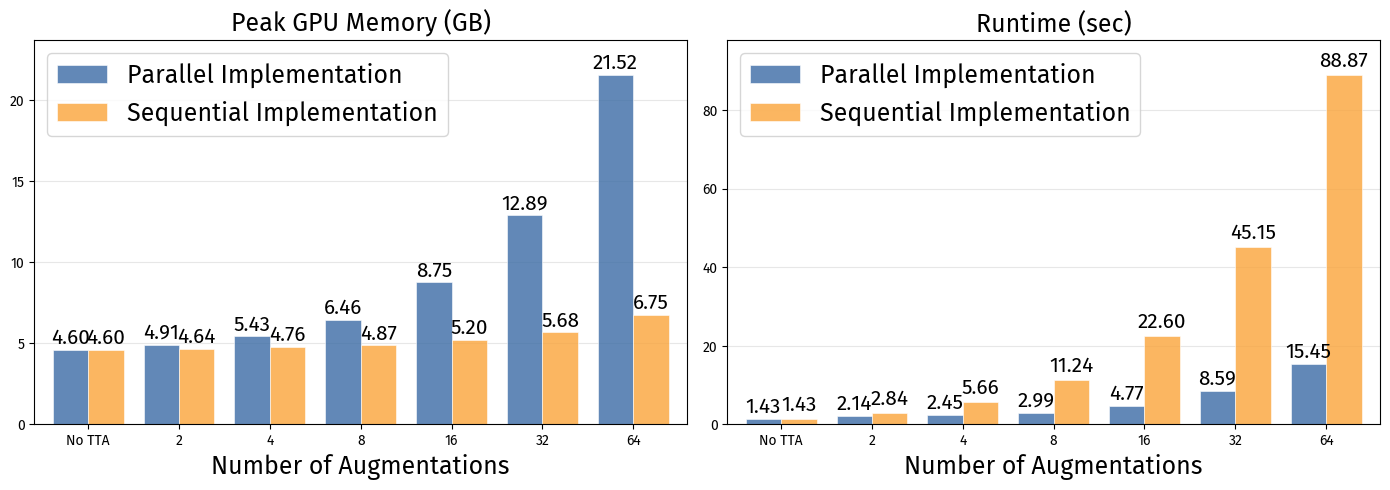

In [7]:
# Overhead Bar Plots
# Data from the table
augmentations = ['No TTA', '2', '4', '8', '16', '32', '64']
peak_memory_parallel = [4.6, 4.6 + 0.31, 4.6 + 0.83, 4.6 + 1.86, 4.6 + 4.15, 4.6 + 8.29, 21.52]
peak_memory_sequential = [4.6, 4.6 + 0.04, 4.6 + 0.16, 4.6 + 0.27, 4.6 + 0.60, 4.6 + 1.08, 4.6 + 2.15]
runtime_parallel = [1.43, 1.43 + 0.71, 1.43 + 1.02, 1.43 + 1.56, 1.43 + 3.34, 1.43 + 7.16, 1.43 + 14.02]
runtime_sequential = [1.43, 1.43 + 1.41, 1.43 + 4.23, 1.43 + 9.81, 1.43 + 21.17, 1.43 + 43.72, 1.43 + 87.44]

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar width and positions
bar_width = 0.39
x_pos = np.arange(len(augmentations))

# Colors
color_parallel = color_palette_primary[0]  # Using the first color from the palette
color_sequential = color_palette_primary[4]  # Using the fifth color from the palette

# Plot 1: Peak GPU Memory Overhead
bars1 = ax1.bar(x_pos - bar_width/2, peak_memory_parallel, bar_width, 
                label='Parallel Implementation', color=color_parallel, alpha=global_alpha, 
                edgecolor='white', linewidth=0.5)
bars2 = ax1.bar(x_pos + bar_width/2, peak_memory_sequential, bar_width,
                label='Sequential Implementation', color=color_sequential, alpha=global_alpha,
                edgecolor='white', linewidth=0.5)

ax1.set_xlabel('Number of Augmentations', fontsize=global_fontsize)
#ax1.set_ylabel('Peak GPU Memory Overhead (GB)')
ax1.set_title('Peak GPU Memory (GB)', fontsize=global_fontsize)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(augmentations)
ax1.legend(fontsize=global_fontsize)
ax1.grid(True, alpha=global_grid_alpha, axis='y')
ax1.set_axisbelow(True)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom', fontsize=global_fontsize_small)

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom', fontsize=global_fontsize_small)

# Plot 2: Runtime Overhead
bars3 = ax2.bar(x_pos - bar_width/2, runtime_parallel, bar_width,
                label='Parallel Implementation', color=color_parallel, alpha=global_alpha,
                edgecolor='white', linewidth=0.5)
bars4 = ax2.bar(x_pos + bar_width/2, runtime_sequential, bar_width,
                label='Sequential Implementation', color=color_sequential, alpha=global_alpha,
                edgecolor='white', linewidth=0.5)

ax2.set_xlabel('Number of Augmentations', fontsize=global_fontsize)
#ax2.set_ylabel('Runtime Overhead (s)')
ax2.set_title('Runtime (sec)', fontsize=global_fontsize)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(augmentations)
ax2.legend(fontsize=global_fontsize)
ax2.grid(True, alpha=global_grid_alpha, axis='y')
ax2.set_axisbelow(True)

# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}', ha='center', va='bottom', fontsize=global_fontsize_small)

for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1.0,
             f'{height:.2f}', ha='center', va='bottom', fontsize=global_fontsize_small)

ax1.margins(x=0.03, y=0.1)
ax2.margins(x=0.03, y=0.1)

# Adjust layout
plt.tight_layout()
plt.show()

fig.savefig(f"{save_path}/overhead.pdf", bbox_inches='tight')

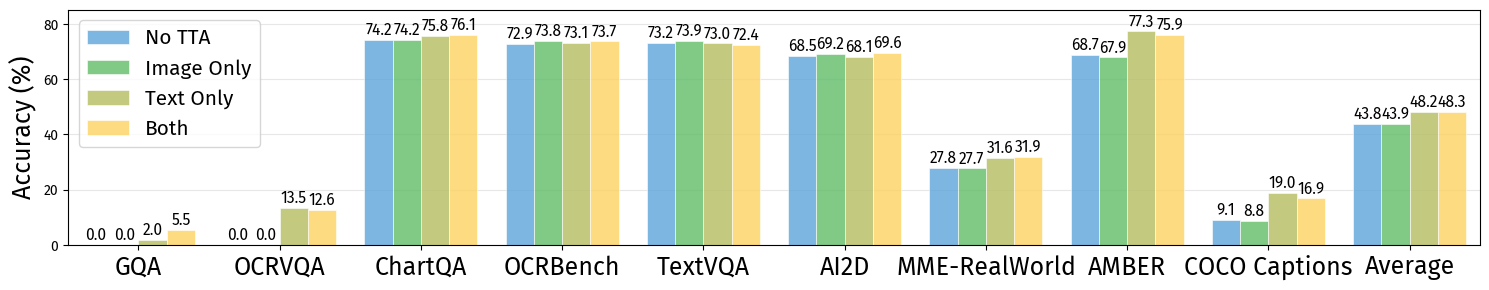

In [8]:
# TTA Strategy Comparison Bar Plot

# Data from the table with realistic values for TTA strategies
datasets = ['GQA','OCRVQA', 'ChartQA', 'OCRBench', 'TextVQA', 'AI2D', 'MME-RealWorld', 'AMBER', 'COCO Captions', 'Average']
no_tta = [0.0, 0.0, 74.2, 72.9,   73.2, 68.5, 27.8, 68.7, 9.1, 43.8]
both   = [5.5, 12.6, 76.1, 73.7,   72.4, 69.6, 31.9, 75.9, 16.9, 48.3]
text_only = [2.0, 13.5, 75.8, 73.1,   73.0, 68.1, 31.6, 77.3, 19.0, 48.2]
image_only = [0.0, 0.0, 74.2, 73.8,   73.9, 69.2, 27.7, 67.9, 8.8, 43.9]

# Set up the figure
fig, ax = plt.subplots(figsize=(15, 3))

# Bar width and positions
bar_width = 0.2
x_pos = np.arange(len(datasets))

# Colors for different strategies
colors = [color_palette_primary[1], color_palette_primary[2], color_palette_primary[3], color_palette_primary[5]]

# Create bars
bars1 = ax.bar(x_pos - 1.5*bar_width, no_tta, bar_width, 
               label='No TTA', color=colors[0], alpha=global_alpha, 
               edgecolor='white', linewidth=0.5)
bars2 = ax.bar(x_pos - 0.5*bar_width, image_only, bar_width,
               label='Image Only', color=colors[1], alpha=global_alpha,
               edgecolor='white', linewidth=0.5)
bars3 = ax.bar(x_pos + 0.5*bar_width, text_only, bar_width,
               label='Text Only', color=colors[2], alpha=global_alpha,
               edgecolor='white', linewidth=0.5)
bars4 = ax.bar(x_pos + 1.5*bar_width, both, bar_width,
               label='Both', color=colors[3], alpha=global_alpha,
               edgecolor='white', linewidth=0.5)

# Customize the plot
# ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy (%)', fontsize=global_fontsize)
# ax.set_title('TTA Strategy Comparison Across Datasets')
ax.set_xticks(x_pos)
ax.set_xticklabels(datasets, ha='center', fontsize=global_fontsize)
ax.legend(loc='upper left', fontsize=global_fontsize_small)
ax.grid(True, alpha=global_grid_alpha, axis='y')
ax.set_axisbelow(True)
ax.margins(x=0.01, y=0.1)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}', ha='center', va='bottom', fontsize=global_fontsize_small*0.75)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

# Adjust layout
plt.figure(fig.number)
plt.tight_layout()
plt.show()

fig.savefig(f"{save_path}/tta_strategy_comparison.pdf", bbox_inches='tight')

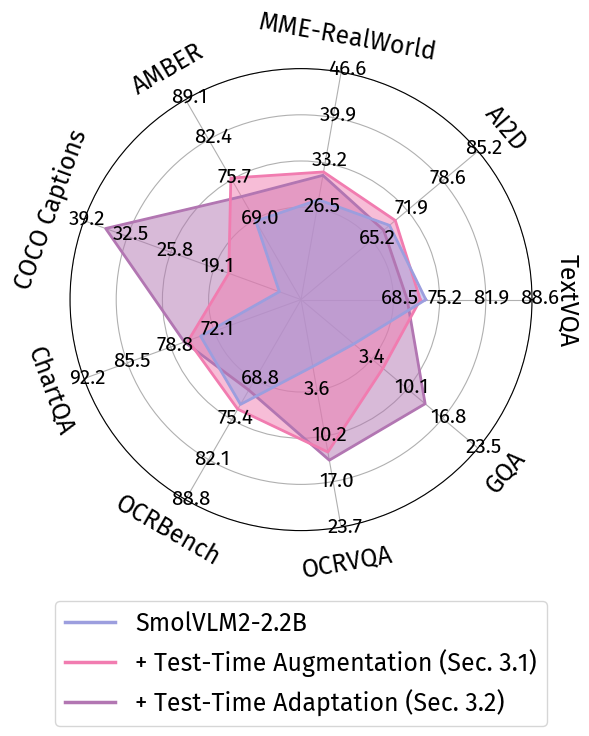

In [9]:
# Radar Chart Visualization
def pre_normalize(raw_data, labels):
    data_list = cp.deepcopy(raw_data)
    minimum, maximum, max_range, range_map = {}, {}, 0, {}
    for lb in labels:
        minimum[lb] = min([x[lb] for x in data_list])
        maximum[lb] = max([x[lb] for x in data_list])
        max_range = max(max_range, maximum[lb] - minimum[lb])
    max_range *= 1.25
    for lb in labels:
        mid = (minimum[lb] + maximum[lb]) / 2
        new_range = (mid - max_range / 2, mid + max_range / 2) if (mid + max_range / 2) < 100 else (100 - max_range, 100)
        range_map[lb] = new_range
        for item in data_list:
            assert new_range[0] <= item[lb] <= new_range[1]
            item[lb] = (item[lb] - new_range[0]) / max_range * 100
    return data_list, range_map

# Your data in the format needed
model2vis = ['SmolVLM2-2.2B', '+ Test-Time Augmentation (Sec. 3.1)', '+ Test-Time Adaptation (Sec. 3.2)']
colors = [color_palette_primary[7], color_palette_primary[8], color_palette_primary[6]]

# Create data structure exactly like visualize.ipynb
labels = [     'TextVQA',  'AI2D',   'MME-RealWorld', 'AMBER',  'COCO Captions',  'ChartQA','OCRBench', 'OCRVQA', 'GQA',]
num_vars = len(labels)

# Raw data as list of dicts with metric names as keys (matching visualize.ipynb structure)
raw_data = [
    { 'ChartQA': 0.742,  'OCRBench': 0.729, 'OCRVQA': 0.000, 'GQA': 0.000,   'TextVQA': 0.732,  'AI2D': 0.685, 'MME-RealWorld': 0.278,  'AMBER': 0.687, 'COCO Captions': 0.091, },
    { 'ChartQA': 0.761,  'OCRBench': 0.737, 'OCRVQA': 0.126, 'GQA': 0.055,   'TextVQA': 0.724,  'AI2D': 0.696, 'MME-RealWorld': 0.319, 'AMBER': 0.759, 'COCO Captions': 0.169, },
    { 'ChartQA': 0.767,  'OCRBench': 0.705, 'OCRVQA': 0.138, 'GQA': 0.135,   'TextVQA': 0.705,  'AI2D': 0.674, 'MME-RealWorld': 0.314, 'AMBER': 0.728, 'COCO Captions': 0.359, },
]

data_list, range_map = pre_normalize(raw_data, labels)

alpha = global_grid_alpha # global_grid_alpha
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles_deg = np.linspace(0, 360, num_vars, endpoint=False).tolist()
fig, ax_base = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), subplot_kw=dict(polar=True))

for i in range(len(data_list)-1, -1, -1):
    item = data_list[i]
    model_name = model2vis[i]
    color = colors[i]
    tmp_angles = angles[:] + [angles[0]]
    tmp_values = [item[lb] for lb in labels] + [item[labels[0]]]
    ax_base.plot(tmp_angles, tmp_values, color=color, linewidth=2, linestyle='solid', label=model_name)
    ax_base.fill(tmp_angles, tmp_values, color=color, alpha=0.5)
    
angles += [angles[0]]
ax_base.set_ylim(0, 100)
ax_base.set_yticks([40, 60, 80, 100])
ax_base.set_yticklabels([''] * 4)

ax_base.tick_params(pad=15)
ax_base.set_xticks(angles[:-1])
ax_base.set_xticklabels(labels, fontsize=global_fontsize)
ax_base.set_axisbelow(True)

# Apply rotation to benchmark names - exact copy from visualize.ipynb
dataset_map = {}
for i, label in enumerate(ax_base.get_xticklabels()):
    x,y = label.get_position()
    text = label.get_text()
    text = dataset_map[text] if text in dataset_map else text
    lab = ax_base.text(x, y, text, transform=label.get_transform(),
                  ha=label.get_ha(), va=label.get_va(), fontsize=global_fontsize)
    added_angle = 270 if (360 / num_vars * i <= 180) else 90
    lab.set_rotation(360 / num_vars * i + added_angle)

ax_base.set_xticklabels([])

handle_legend = ax_base.get_legend_handles_labels()
leg = ax_base.legend(handle_legend[0][::-1], handle_legend[1][::-1], loc='lower center', bbox_to_anchor=(0.5, -0.45), fontsize=global_fontsize, ncol=1, frameon=True)#, labelspacing=0.112)
for line in leg.get_lines():
    line.set_linewidth(2.5)

cx, cy, sz = 0.44, 0.435, 0.34
axes = [fig.add_axes([cx - sz, cy - sz, cx + sz, cy + sz], projection='polar', label='axes%d' % i) for i in range(num_vars)]
    
for ax, angle, label in zip(axes, angles_deg, labels):
    ax.patch.set_visible(False)
    ax.grid(False)
    ax.xaxis.set_visible(False)
    cur_range = range_map[label]
    label_list = [cur_range[0] + (cur_range[1] - cur_range[0]) / 5 * i for i in range(2, 6)]
    # Convert to percentages by multiplying by 100, format as .1f without % sign
    label_list = [f'{x*100:.1f}' for x in label_list]
    ax.set_rgrids(range(40, 120, 20), angle=angle, labels=label_list, fontsize=global_fontsize_small)
    ax.spines['polar'].set_visible(False)
    ax.set_ylim(0, 100)


# title_text = 'SmolVLM2-2.2B Baseline vs TTA Performance Comparison'
# plt.figtext(0.5, 0.95, title_text, fontproperties=font18, ha='center')
plt.show()

fig.savefig(f"{save_path}/radar_chart.pdf", bbox_inches='tight')

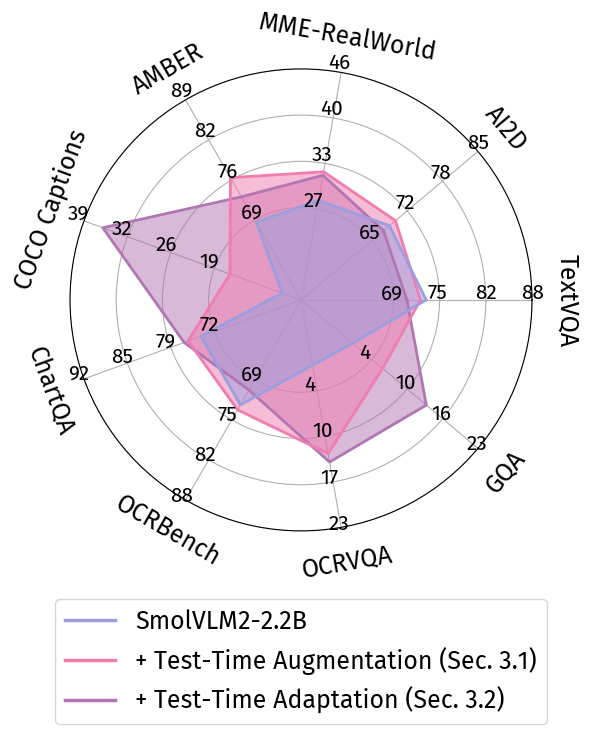

In [10]:
# Radar Chart Visualization
def pre_normalize(raw_data, labels):
    data_list = cp.deepcopy(raw_data)
    minimum, maximum, max_range, range_map = {}, {}, 0, {}
    for lb in labels:
        minimum[lb] = min([x[lb] for x in data_list])
        maximum[lb] = max([x[lb] for x in data_list])
        max_range = max(max_range, maximum[lb] - minimum[lb])
    max_range *= 1.21
    for lb in labels:
        mid = (minimum[lb] + maximum[lb]) / 2
        new_range = (mid - max_range / 2, mid + max_range / 2) if (mid + max_range / 2) < 100 else (100 - max_range, 100)
        range_map[lb] = new_range
        for item in data_list:
            assert new_range[0] <= item[lb] <= new_range[1]
            item[lb] = (item[lb] - new_range[0]) / max_range * 100
    return data_list, range_map

# Your data in the format needed
model2vis = ['SmolVLM2-2.2B', '+ Test-Time Augmentation (Sec. 3.1)', '+ Test-Time Adaptation (Sec. 3.2)']
colors = [color_palette_primary[7], color_palette_primary[8], color_palette_primary[6]]

# Create data structure exactly like visualize.ipynb
labels = [          'TextVQA',  'AI2D', 'MME-RealWorld', 'AMBER',   'COCO Captions', 'ChartQA',  'OCRBench', 'OCRVQA',  'GQA', ]
num_vars = len(labels)

# Raw data as list of dicts with metric names as keys (matching visualize.ipynb structure)
raw_data = [
    { 'ChartQA': 0.742,  'OCRBench': 0.729, 'OCRVQA': 0.000, 'GQA': 0.000,   'TextVQA': 0.732,  'AI2D': 0.685, 'MME-RealWorld': 0.278,  'AMBER': 0.687, 'COCO Captions': 0.091, },
    { 'ChartQA': 0.761,  'OCRBench': 0.737, 'OCRVQA': 0.126, 'GQA': 0.055,   'TextVQA': 0.724,  'AI2D': 0.696, 'MME-RealWorld': 0.319, 'AMBER': 0.759, 'COCO Captions': 0.169, },
    { 'ChartQA': 0.767,  'OCRBench': 0.705, 'OCRVQA': 0.138, 'GQA': 0.135,   'TextVQA': 0.705,  'AI2D': 0.674, 'MME-RealWorld': 0.314, 'AMBER': 0.728, 'COCO Captions': 0.359, },
]

data_list, range_map = pre_normalize(raw_data, labels)

alpha = global_grid_alpha # global_grid_alpha
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles_deg = np.linspace(0, 360, num_vars, endpoint=False).tolist()
fig, ax_base = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), subplot_kw=dict(polar=True))

for i in range(len(data_list)-1, -1, -1):
    item = data_list[i]
    model_name = model2vis[i]
    color = colors[i]
    tmp_angles = angles[:] + [angles[0]]
    tmp_values = [item[lb] for lb in labels] + [item[labels[0]]]
    ax_base.plot(tmp_angles, tmp_values, color=color, linewidth=2, linestyle='solid', label=model_name)
    ax_base.fill(tmp_angles, tmp_values, color=color, alpha=0.5)
    
angles += [angles[0]]
ax_base.set_ylim(0, 100)
ax_base.set_yticks([40, 60, 80, 100])
ax_base.set_yticklabels([''] * 4)

ax_base.tick_params(pad=15)
ax_base.set_xticks(angles[:-1])
ax_base.set_xticklabels(labels, fontsize=global_fontsize)
ax_base.set_axisbelow(True)

# Apply rotation to benchmark names - exact copy from visualize.ipynb
dataset_map = {}
for i, label in enumerate(ax_base.get_xticklabels()):
    x,y = label.get_position()
    text = label.get_text()
    text = dataset_map[text] if text in dataset_map else text
    lab = ax_base.text(x, y, text, transform=label.get_transform(),
                  ha=label.get_ha(), va=label.get_va(), fontsize=global_fontsize)
    added_angle = 270 if (360 / num_vars * i <= 180) else 90
    lab.set_rotation(360 / num_vars * i + added_angle)

ax_base.set_xticklabels([])

handle_legend = ax_base.get_legend_handles_labels()
leg = ax_base.legend(handle_legend[0][::-1], handle_legend[1][::-1], loc='lower center', bbox_to_anchor=(0.5, -0.445), fontsize=global_fontsize, ncol=1, frameon=True,
                    #  handlelength=1.5
                     )#, labelspacing=0.112)
for line in leg.get_lines():
    line.set_linewidth(2.5)

cx, cy, sz = 0.44, 0.44, 0.34
axes = [fig.add_axes([cx - sz, cy - sz, cx + sz, cy + sz], projection='polar', label='axes%d' % i) for i in range(num_vars)]
    
for ax, angle, label in zip(axes, angles_deg, labels):
    ax.patch.set_visible(False)
    ax.grid(False)
    ax.xaxis.set_visible(False)
    cur_range = range_map[label]
    label_list = [cur_range[0] + (cur_range[1] - cur_range[0]) / 5 * i for i in range(2, 6)]
    # Convert to percentages by multiplying by 100, format as .1f without % sign
    label_list = [f'{int(round(x*100))}' for x in label_list]
    ax.set_rgrids(range(40, 120, 20), angle=angle, labels=label_list, fontsize=global_fontsize_small)
    ax.spines['polar'].set_visible(False)
    ax.set_ylim(0, 100)


# title_text = 'SmolVLM2-2.2B Baseline vs TTA Performance Comparison'
# plt.figtext(0.5, 0.95, title_text, fontproperties=font18, ha='center')
plt.show()

fig.savefig(f"{save_path}/radar_chart_integers.pdf", bbox_inches='tight')

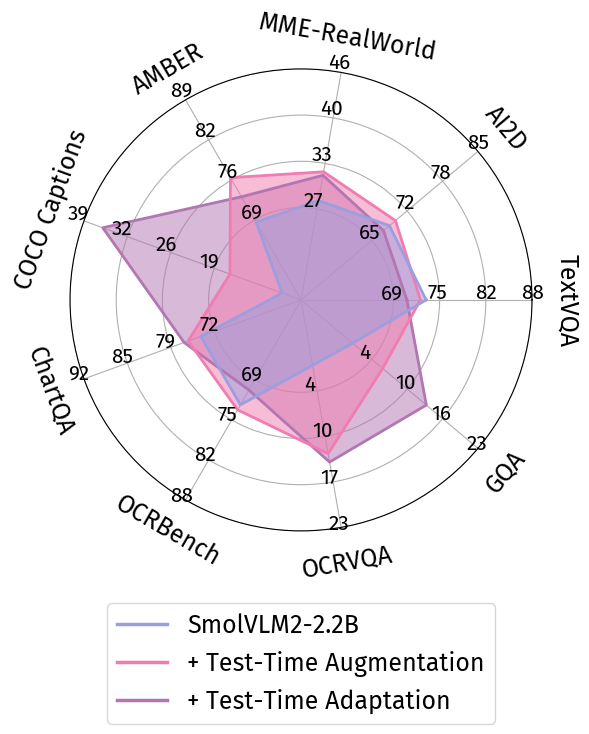

In [24]:
# Radar Chart Visualization
def pre_normalize(raw_data, labels):
    data_list = cp.deepcopy(raw_data)
    minimum, maximum, max_range, range_map = {}, {}, 0, {}
    for lb in labels:
        minimum[lb] = min([x[lb] for x in data_list])
        maximum[lb] = max([x[lb] for x in data_list])
        max_range = max(max_range, maximum[lb] - minimum[lb])
    max_range *= 1.21
    for lb in labels:
        mid = (minimum[lb] + maximum[lb]) / 2
        new_range = (mid - max_range / 2, mid + max_range / 2) if (mid + max_range / 2) < 100 else (100 - max_range, 100)
        range_map[lb] = new_range
        for item in data_list:
            assert new_range[0] <= item[lb] <= new_range[1]
            item[lb] = (item[lb] - new_range[0]) / max_range * 100
    return data_list, range_map

# Your data in the format needed
model2vis = ['SmolVLM2-2.2B', '+ Test-Time Augmentation', '+ Test-Time Adaptation']
colors = [color_palette_primary[7], color_palette_primary[8], color_palette_primary[6]]

# Create data structure exactly like visualize.ipynb
labels = [          'TextVQA',  'AI2D', 'MME-RealWorld', 'AMBER',   'COCO Captions', 'ChartQA',  'OCRBench', 'OCRVQA',  'GQA', ]
num_vars = len(labels)

# Raw data as list of dicts with metric names as keys (matching visualize.ipynb structure)
raw_data = [
    { 'ChartQA': 0.742,  'OCRBench': 0.729, 'OCRVQA': 0.000, 'GQA': 0.000,   'TextVQA': 0.732,  'AI2D': 0.685, 'MME-RealWorld': 0.278,  'AMBER': 0.687, 'COCO Captions': 0.091, },
    { 'ChartQA': 0.761,  'OCRBench': 0.737, 'OCRVQA': 0.126, 'GQA': 0.055,   'TextVQA': 0.724,  'AI2D': 0.696, 'MME-RealWorld': 0.319, 'AMBER': 0.759, 'COCO Captions': 0.169, },
    { 'ChartQA': 0.767,  'OCRBench': 0.705, 'OCRVQA': 0.138, 'GQA': 0.135,   'TextVQA': 0.705,  'AI2D': 0.674, 'MME-RealWorld': 0.314, 'AMBER': 0.728, 'COCO Captions': 0.359, },
]

data_list, range_map = pre_normalize(raw_data, labels)

alpha = global_grid_alpha # global_grid_alpha
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles_deg = np.linspace(0, 360, num_vars, endpoint=False).tolist()
fig, ax_base = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), subplot_kw=dict(polar=True))

for i in range(len(data_list)-1, -1, -1):
    item = data_list[i]
    model_name = model2vis[i]
    color = colors[i]
    tmp_angles = angles[:] + [angles[0]]
    tmp_values = [item[lb] for lb in labels] + [item[labels[0]]]
    ax_base.plot(tmp_angles, tmp_values, color=color, linewidth=2, linestyle='solid', label=model_name)
    ax_base.fill(tmp_angles, tmp_values, color=color, alpha=0.5)
    
angles += [angles[0]]
ax_base.set_ylim(0, 100)
ax_base.set_yticks([40, 60, 80, 100])
ax_base.set_yticklabels([''] * 4)

ax_base.tick_params(pad=15)
ax_base.set_xticks(angles[:-1])
ax_base.set_xticklabels(labels, fontsize=global_fontsize)
ax_base.set_axisbelow(True)

# Apply rotation to benchmark names - exact copy from visualize.ipynb
dataset_map = {}
for i, label in enumerate(ax_base.get_xticklabels()):
    x,y = label.get_position()
    text = label.get_text()
    text = dataset_map[text] if text in dataset_map else text
    lab = ax_base.text(x, y, text, transform=label.get_transform(),
                  ha=label.get_ha(), va=label.get_va(), fontsize=global_fontsize)
    added_angle = 270 if (360 / num_vars * i <= 180) else 90
    lab.set_rotation(360 / num_vars * i + added_angle)

ax_base.set_xticklabels([])

handle_legend = ax_base.get_legend_handles_labels()
leg = ax_base.legend(handle_legend[0][::-1], handle_legend[1][::-1], loc='lower center', bbox_to_anchor=(0.5, -0.445), fontsize=global_fontsize, ncol=1, frameon=True,
                    #  handlelength=1.5
                     )#, labelspacing=0.112)
for line in leg.get_lines():
    line.set_linewidth(2.5)

cx, cy, sz = 0.44, 0.44, 0.34
axes = [fig.add_axes([cx - sz, cy - sz, cx + sz, cy + sz], projection='polar', label='axes%d' % i) for i in range(num_vars)]
    
for ax, angle, label in zip(axes, angles_deg, labels):
    ax.patch.set_visible(False)
    ax.grid(False)
    ax.xaxis.set_visible(False)
    cur_range = range_map[label]
    label_list = [cur_range[0] + (cur_range[1] - cur_range[0]) / 5 * i for i in range(2, 6)]
    # Convert to percentages by multiplying by 100, format as .1f without % sign
    label_list = [f'{int(round(x*100))}' for x in label_list]
    ax.set_rgrids(range(40, 120, 20), angle=angle, labels=label_list, fontsize=global_fontsize_small)
    ax.spines['polar'].set_visible(False)
    ax.set_ylim(0, 100)


# title_text = 'SmolVLM2-2.2B Baseline vs TTA Performance Comparison'
# plt.figtext(0.5, 0.95, title_text, fontproperties=font18, ha='center')
plt.show()

fig.savefig(f"{save_path}/radar_chart_integers_website.pdf", bbox_inches='tight')

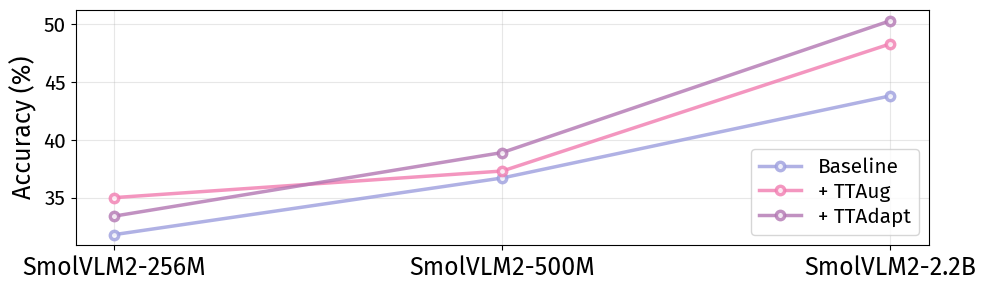

In [12]:
x_axis_labels = ['SmolVLM2-256M', 'SmolVLM2-500M', 'SmolVLM2-2.2B']
data_scaling = {
    "Baseline": [31.8, 36.7, 43.8],
    "+ TTAug": [35.0, 37.3, 48.3],
    "+ TTAdapt": [33.4, 38.9, 50.3]
}

fig = plt.figure(figsize=(10, 3))

for i, (key, values) in enumerate(data_scaling.items()):
    plt.plot(x_axis_labels, values, 'o-',
                linewidth=2.5, markersize=6,
                color=colors[i], markerfacecolor='white',
                markeredgewidth=2.5, markeredgecolor=colors[i],
                alpha=global_alpha, label=key)

plt.ylabel('Accuracy (%)', fontsize=global_fontsize)
plt.grid(True, alpha=global_grid_alpha)
plt.xticks(ticks=np.arange(len(x_axis_labels)), labels=x_axis_labels, ha='center', fontsize=global_fontsize)
plt.yticks(fontsize=global_fontsize_small)
plt.legend(loc='lower right', fontsize=global_fontsize_small, labelspacing=0.25)

plt.tight_layout()
plt.show()

fig.savefig(f"{save_path}/scaling.pdf", bbox_inches='tight')

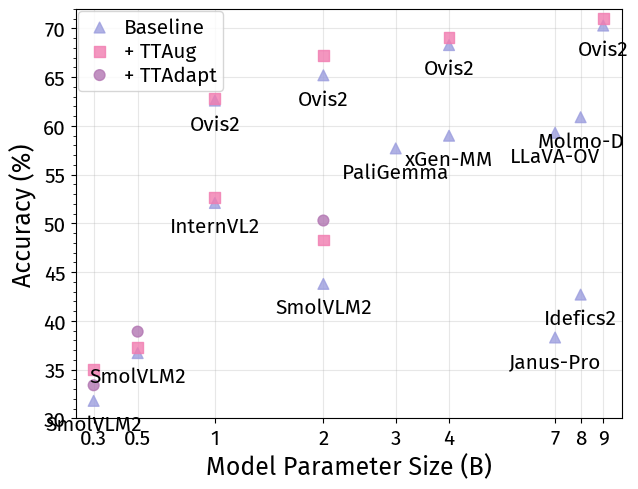

In [13]:
# New scatter plot with different shapes and parameter sizes
data_points = [
    #########################
    ## InternVL2-1B
    {
        "name": "InternVL2",
        "shape": "triangle",
        "param_size": "1B",
        "accuracy_value": 52.1,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "1B", 
        "accuracy_value": 52.7,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "1B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## Ovis2-9B
    {
        "name": "Ovis2",
        "shape": "triangle",
        "param_size": "9B",#"8.94B",
        "accuracy_value": 70.3,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "9B",#"8.94B",
        "accuracy_value": 71.0,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "2.5B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## Ovis2-4B
    {
        "name": "Ovis2",
        "shape": "triangle",
        "param_size": "4B",
        "accuracy_value": 68.3,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "4B",
        "accuracy_value": 69.1,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "2.5B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## Ovis2-2B
    {
        "name": "Ovis2",
        "shape": "triangle",
        "param_size": "2B",
        "accuracy_value": 65.2,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "2B",
        "accuracy_value": 67.2,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "2.5B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## Ovis2-1B
    {
        "name": "Ovis2",
        "shape": "triangle",
        "param_size": "1B",
        "accuracy_value": 62.6,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "1B",
        "accuracy_value": 62.8,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "2.5B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## SmolVLM2-2.2B
    {
        "name": "SmolVLM2",
        "shape": "triangle",
        "param_size": "2B",#2.2B
        "accuracy_value": 43.8,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "2B", 
        "accuracy_value": 48.3,
        "color": color_palette_primary[8], 
    },
    {
        "name": "",
        "shape": "circle",
        "param_size": "2B",
        "accuracy_value": 50.3,
        "color": color_palette_primary[6]
    },
    #########################
    ## SmolVLM2-500M
    {
        "name": "SmolVLM2",
        "shape": "triangle",
        "param_size": "500M",
        "accuracy_value": 36.7,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "500M", 
        "accuracy_value": 37.3,
        "color": color_palette_primary[8], 
    },
    {
        "name": "",
        "shape": "circle",
        "param_size": "500M",
        "accuracy_value": 38.9,
        "color": color_palette_primary[6]
    },
    #########################
    ## SmolVLM2-256M
    {
        "name": "SmolVLM2",
        "shape": "triangle",
        "param_size": "256M",
        "accuracy_value": 31.8,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "256M", 
        "accuracy_value": 35.0,
        "color": color_palette_primary[8], 
    },
    {
        "name": "",
        "shape": "circle",
        "param_size": "256M",
        "accuracy_value": 33.4,
        "color": color_palette_primary[6]
    },
    ##########################
    ## Janus-Pro
    {
        "name": "Janus-Pro",
        "shape": "triangle",
        "param_size": "7B",#"7.4B",
        "accuracy_value": 38.3,
        "color": color_palette_primary[7], 
    },
    #############################
    ## Idefics2
    {
        "name": "Idefics2",
        "shape": "triangle",
        "param_size": "8B",
        "accuracy_value": 42.7,
        "color": color_palette_primary[7], 
    },
    #############################
    ## Molmo-D
    {
        "name": "Molmo-D",
        "shape": "triangle",
        "param_size": "8B",
        "accuracy_value": 60.9,
        "color": color_palette_primary[7], 
    },
    #############################
    ## LLaVA-OneVision
    {
        "name": "LLaVA-OV",
        "shape": "triangle",
        "param_size": "7B",
        "accuracy_value": 59.3,
        "color": color_palette_primary[7], 
    },
    #############################
    ## PaliGemma
    {
        "name": "PaliGemma",
        "shape": "triangle",
        "param_size": "3B",
        "accuracy_value": 57.7,
        "color": color_palette_primary[7], 
    },
    #############################
    ## xGen-MM
    {
        "name": "xGen-MM",
        "shape": "triangle",
        "param_size": "4B",
        "accuracy_value": 59.0,
        "color": color_palette_primary[7], 
    },
    #############################
    ## LLaVA-NeXT
    # {
    #     "name": "LLaVA-NeXT",
    #     "shape": "triangle",
    #     "param_size": "8B",
    #     "accuracy_value": 59.4,
    #     "color": color_palette_primary[7], 
    # },
]

param_size_order = {
    size_str: (int(size_str[:-1]) / 1000 if size_str.endswith("M") else float(size_str[:-1]))
    for size_str in {point["param_size"] for point in data_points}
}

arrows = [
    # {
    #     "start": ("256M", 50.3),
    #     "finish": ("256M", 51.3)
    # },
    # {
    #     "start": ("256M", 51.3), 
    #     "finish": ("256M", 51.5)
    # },
    # {
    #     "start": ("500M", 51.3),
    #     "finish": ("500M", 52.3)
    # },
    # {
    #     "start": ("500M", 52.3),
    #     "finish": ("500M", 52.5)
    # }
]

######################################################################################

# Map shapes to matplotlib markers
shape_map = {
    "circle": "o",
    "square": "s", 
    "triangle": "^",
    "pentagon": "p",
    "x": "x"
}

shape_label_map = {
    "circle": "+ TTAdapt",
    "square": "+ TTAug",
    "triangle": "Baseline"
}

fig, ax = plt.subplots(figsize=(6.5, 5))

# Plot arrows first (behind markers)
for arrow in arrows:
    start_param_size, start_accuracy = arrow["start"]
    finish_param_size, finish_accuracy = arrow["finish"]
    
    # Convert parameter sizes to numeric values
    start_x = param_size_order[start_param_size]
    finish_x = param_size_order[finish_param_size]
    
    # Plot arrow
    ax.annotate('', xy=(finish_x, finish_accuracy), xytext=(start_x, start_accuracy),
                arrowprops=dict(arrowstyle='->', color='black'))

# Group data by shape for legend
shape_groups = {}
for point in data_points:
    shape = point["shape"]
    if shape not in shape_groups:
        shape_groups[shape] = []
    shape_groups[shape].append(point)

# Plot each group (markers on top of arrows)
for shape, points in shape_groups.items():
    x_values = []
    y_values = []
    colors = []
    labels = []
    
    for point in points:
        # Use parameter size as x-axis (convert to numeric for plotting)
        param_numeric = param_size_order[point["param_size"]]
        x_values.append(param_numeric)
        y_values.append(point["accuracy_value"])
        colors.append(point["color"])
        labels.append(point["name"])
    
    # Plot with the specific shape and uniform size
    scatter = ax.scatter(x_values, y_values, 
                        marker=shape_map[shape], 
                        s=60,  # Fixed size for all markers
                        c=colors,
                        alpha=global_alpha,
                        # edgecolors='white',
                        # linewidth=1.5,
                        label=f'{shape_label_map[shape]}',
                        zorder=3)  # Ensure markers are on top

# Add text labels under data points that have names
for point in data_points:
    if point["name"]:  # Only add label if name is not empty
        param_numeric = param_size_order[point["param_size"]]
        ax.annotate(point["name"], 
                   (param_numeric, point["accuracy_value"]),
                   xytext=(0, -10), textcoords='offset points',
                   ha='center', va='top',
                   fontsize=global_fontsize_small,
                   zorder=4)  # Ensure labels are on top

# Customize the plot
ax.set_xlabel('Model Parameter Size (B)', fontsize=global_fontsize)
ax.set_ylabel('Accuracy (%)', fontsize=global_fontsize)

# Set x-axis to log scale for better visualization of parameter sizes
ax.set_xscale('asinh')
ax.set_xticks(list(param_size_order.values()))
ax.set_xticklabels([f"{param_size_order[i]:.1f}" if param_size_order[i] < 1 else int(param_size_order[i]) for i in param_size_order.keys()], fontsize=global_fontsize_small)
ax.tick_params(axis='y', labelsize=global_fontsize_small)
ax.tick_params(axis='x', which='minor', bottom=False)
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust y-axis range to provide space for text labels at the bottom
ax.set_ylim(30, 72)
ax.set_xlim(0.16, 9.9)

# Add grid
ax.grid(True, alpha=global_grid_alpha, zorder=1)  # Grid behind everything
ax.set_axisbelow(True)

# Add legend
# make this smaller width height
ax.legend(fontsize=global_fontsize_small, loc='upper left', borderpad=0.3, labelspacing=0.2, handletextpad=0.4, handlelength=1.5, bbox_to_anchor=(-0.015, 1.02))

plt.tight_layout()
plt.show()

fig.savefig(f"{save_path}/parameter_size_scatter.pdf", bbox_inches='tight')

/work3/monka/.CACHE/tmp/ipykernel_2470483/2317589266.py:306: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.0, 11.1)


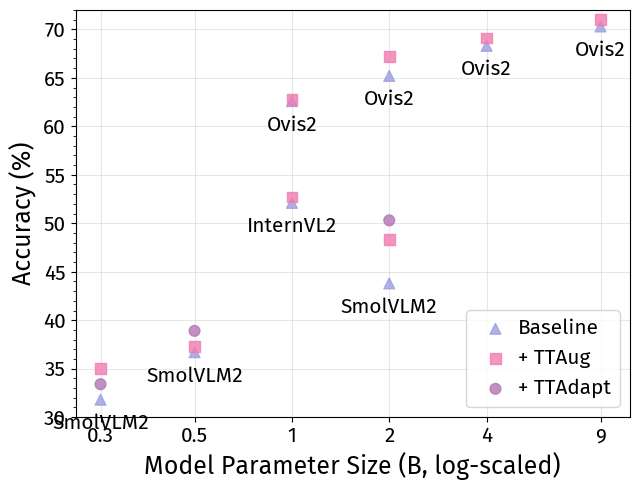

In [14]:
# New scatter plot with different shapes and parameter sizes
data_points = [
    #########################
    ## InternVL2-1B
    {
        "name": "InternVL2",
        "shape": "triangle",
        "param_size": "1B",
        "accuracy_value": 52.1,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "1B", 
        "accuracy_value": 52.7,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "1B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## Ovis2-9B
    {
        "name": "Ovis2",
        "shape": "triangle",
        "param_size": "9B",#"8.94B",
        "accuracy_value": 70.3,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "9B",#"8.94B",
        "accuracy_value": 71.0,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "2.5B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## Ovis2-4B
    {
        "name": "Ovis2",
        "shape": "triangle",
        "param_size": "4B",
        "accuracy_value": 68.3,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "4B",
        "accuracy_value": 69.1,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "2.5B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## Ovis2-2B
    {
        "name": "Ovis2",
        "shape": "triangle",
        "param_size": "2B",
        "accuracy_value": 65.2,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "2B",
        "accuracy_value": 67.2,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "2.5B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## Ovis2-1B
    {
        "name": "Ovis2",
        "shape": "triangle",
        "param_size": "1B",
        "accuracy_value": 62.6,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "1B",
        "accuracy_value": 62.8,
        "color": color_palette_primary[8], 
    },
    # {
    #     "name": "",
    #     "shape": "circle",
    #     "param_size": "2.5B",
    #     "accuracy_value": 0.0, # TODO
    #     "color": color_palette_primary[6]
    # },
    #########################
    ## SmolVLM2-2.2B
    {
        "name": "SmolVLM2",
        "shape": "triangle",
        "param_size": "2B",#2.2B
        "accuracy_value": 43.8,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "2B", 
        "accuracy_value": 48.3,
        "color": color_palette_primary[8], 
    },
    {
        "name": "",
        "shape": "circle",
        "param_size": "2B",
        "accuracy_value": 50.3,
        "color": color_palette_primary[6]
    },
    #########################
    ## SmolVLM2-500M
    {
        "name": "SmolVLM2",
        "shape": "triangle",
        "param_size": "500M",
        "accuracy_value": 36.7,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "500M", 
        "accuracy_value": 37.3,
        "color": color_palette_primary[8], 
    },
    {
        "name": "",
        "shape": "circle",
        "param_size": "500M",
        "accuracy_value": 38.9,
        "color": color_palette_primary[6]
    },
    #########################
    ## SmolVLM2-256M
    {
        "name": "SmolVLM2",
        "shape": "triangle",
        "param_size": "256M",
        "accuracy_value": 31.8,
        "color": color_palette_primary[7], 
    },
    {
        "name": "",
        "shape": "square",
        "param_size": "256M", 
        "accuracy_value": 35.0,
        "color": color_palette_primary[8], 
    },
    {
        "name": "",
        "shape": "circle",
        "param_size": "256M",
        "accuracy_value": 33.4,
        "color": color_palette_primary[6]
    },
]

param_size_order = {
    size_str: (int(size_str[:-1]) / 1000 if size_str.endswith("M") else float(size_str[:-1]))
    for size_str in {point["param_size"] for point in data_points}
}

arrows = [
    # {
    #     "start": ("256M", 50.3),
    #     "finish": ("256M", 51.3)
    # },
    # {
    #     "start": ("256M", 51.3), 
    #     "finish": ("256M", 51.5)
    # },
    # {
    #     "start": ("500M", 51.3),
    #     "finish": ("500M", 52.3)
    # },
    # {
    #     "start": ("500M", 52.3),
    #     "finish": ("500M", 52.5)
    # }
]

######################################################################################

# Map shapes to matplotlib markers
shape_map = {
    "circle": "o",
    "square": "s", 
    "triangle": "^",
    "pentagon": "p",
    "x": "x"
}

shape_label_map = {
    "circle": "+ TTAdapt",
    "square": "+ TTAug",
    "triangle": "Baseline"
}

fig, ax = plt.subplots(figsize=(6.5, 5))

# Plot arrows first (behind markers)
for arrow in arrows:
    start_param_size, start_accuracy = arrow["start"]
    finish_param_size, finish_accuracy = arrow["finish"]
    
    # Convert parameter sizes to numeric values
    start_x = param_size_order[start_param_size]
    finish_x = param_size_order[finish_param_size]
    
    # Plot arrow
    ax.annotate('', xy=(finish_x, finish_accuracy), xytext=(start_x, start_accuracy),
                arrowprops=dict(arrowstyle='->', color='black'))

# Group data by shape for legend
shape_groups = {}
for point in data_points:
    shape = point["shape"]
    if shape not in shape_groups:
        shape_groups[shape] = []
    shape_groups[shape].append(point)

# Plot each group (markers on top of arrows)
for shape, points in shape_groups.items():
    x_values = []
    y_values = []
    colors = []
    labels = []
    
    for point in points:
        # Use parameter size as x-axis (convert to numeric for plotting)
        param_numeric = param_size_order[point["param_size"]]
        x_values.append(param_numeric)
        y_values.append(point["accuracy_value"])
        colors.append(point["color"])
        labels.append(point["name"])
    
    # Plot with the specific shape and uniform size
    scatter = ax.scatter(x_values, y_values, 
                        marker=shape_map[shape], 
                        s=60,  # Fixed size for all markers
                        c=colors,
                        alpha=global_alpha,
                        # edgecolors='white',
                        # linewidth=1.5,
                        label=f'{shape_label_map[shape]}',
                        zorder=3)  # Ensure markers are on top

# Add text labels under data points that have names
for point in data_points:
    if point["name"]:  # Only add label if name is not empty
        param_numeric = param_size_order[point["param_size"]]
        ax.annotate(point["name"], 
                   (param_numeric, point["accuracy_value"]),
                   xytext=(0, -10), textcoords='offset points',
                   ha='center', va='top',
                   fontsize=global_fontsize_small,
                   zorder=4)  # Ensure labels are on top

# Customize the plot
ax.set_xlabel('Model Parameter Size (B, log-scaled)', fontsize=global_fontsize)
ax.set_ylabel('Accuracy (%)', fontsize=global_fontsize)

# Set x-axis to log scale for better visualization of parameter sizes
ax.set_xscale('log')
ax.set_xticks(list(param_size_order.values()))
ax.set_xticklabels([f"{param_size_order[i]:.1f}" if param_size_order[i] < 1 else int(param_size_order[i]) for i in param_size_order.keys()], fontsize=global_fontsize_small)
ax.tick_params(axis='y', labelsize=global_fontsize_small)
ax.tick_params(axis='x', which='minor', bottom=False)
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust y-axis range to provide space for text labels at the bottom
ax.set_ylim(30, 72)
ax.set_xlim(-0.0, 11.1)

# Add grid
ax.grid(True, alpha=global_grid_alpha, zorder=1)  # Grid behind everything
ax.set_axisbelow(True)

# Add legend
# make this smaller width height
ax.legend(fontsize=global_fontsize_small, loc='lower right',handletextpad=0.1,)#borderpad=0.3, labelspacing=0.2, handletextpad=0.4, handlelength=1.5,)# bbox_to_anchor=(-0.015, 1.02))

plt.tight_layout()
plt.show()

fig.savefig(f"{save_path}/parameter_size_scatter_no_baseline.pdf", bbox_inches='tight')